In [ ]:
!pip install transformers datasets

In [3]:
from datasets import load_dataset

In [ ]:
emotion = load_dataset('emotion')

In [5]:
emotion

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [6]:
train_ds = emotion['train']
train_ds

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

In [7]:
train_ds[0]

{'text': 'i didnt feel humiliated', 'label': 0}

In [8]:
train_ds.features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}

In [9]:
train_ds[:5]

{'text': ['i didnt feel humiliated',
  'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
  'im grabbing a minute to post i feel greedy wrong',
  'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
  'i am feeling grouchy'],
 'label': [0, 0, 3, 2, 3]}

In [10]:
print(train_ds['text'][:5])

['i didnt feel humiliated', 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake', 'im grabbing a minute to post i feel greedy wrong', 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property', 'i am feeling grouchy']


In [11]:
emotion.set_format(type = 'pandas')
df = emotion['train'][:]
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [12]:
def label_int2str(row):
  return emotion['train'].features['label'].int2str(row)

df['label_name'] = df['label'].apply(label_int2str)
print(df.head())

                                                text  label label_name
0                            i didnt feel humiliated      0    sadness
1  i can go from feeling so hopeless to so damned...      0    sadness
2   im grabbing a minute to post i feel greedy wrong      3      anger
3  i am ever feeling nostalgic about the fireplac...      2       love
4                               i am feeling grouchy      3      anger


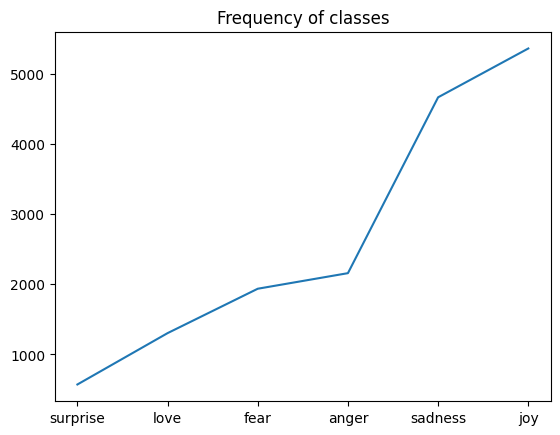

In [13]:
import matplotlib.pyplot as plt
df['label_name'].value_counts(ascending = True).plot()
plt.title('Frequency of classes')
plt.show()

In [14]:
emotion.reset_format()

In [15]:
# Tokenization

text = 'Tokenizing text is a core task of nlp'
tokenized_text = list(text)
print(tokenized_text)


['T', 'o', 'k', 'e', 'n', 'i', 'z', 'i', 'n', 'g', ' ', 't', 'e', 'x', 't', ' ', 'i', 's', ' ', 'a', ' ', 'c', 'o', 'r', 'e', ' ', 't', 'a', 's', 'k', ' ', 'o', 'f', ' ', 'n', 'l', 'p']


In [16]:
token2idx = {ch: i for i, ch in enumerate(sorted(set(text)))}
print(token2idx)

{' ': 0, 'T': 1, 'a': 2, 'c': 3, 'e': 4, 'f': 5, 'g': 6, 'i': 7, 'k': 8, 'l': 9, 'n': 10, 'o': 11, 'p': 12, 'r': 13, 's': 14, 't': 15, 'x': 16, 'z': 17}


In [17]:
input_ids = [token2idx[token] for token in tokenized_text]
print(input_ids)

[1, 11, 8, 4, 10, 7, 17, 7, 10, 6, 0, 15, 4, 16, 15, 0, 7, 14, 0, 2, 0, 3, 11, 13, 4, 0, 15, 2, 14, 8, 0, 11, 5, 0, 10, 9, 12]


In [18]:
import torch
import torch.nn.functional as F

In [19]:
# one-hot encoding
input_ids = torch.tensor(input_ids)
one_hot_encodings = F.one_hot(input_ids, num_classes = len(token2idx))
print(one_hot_encodings.shape)

torch.Size([37, 18])


In [20]:
# Word level tokenization
tokenized_text = text.split()
print(tokenized_text)

['Tokenizing', 'text', 'is', 'a', 'core', 'task', 'of', 'nlp']


In [ ]:
from transformers import AutoTokenizer
model_ckpt = 'distilbert-base-uncased'
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

In [22]:
encoded_text = tokenizer(text)
print(encoded_text)

{'input_ids': [101, 19204, 6026, 3793, 2003, 1037, 4563, 4708, 1997, 17953, 2361, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [23]:
tokens = tokenizer.convert_ids_to_tokens(encoded_text.input_ids)
print(tokens)

['[CLS]', 'token', '##izing', 'text', 'is', 'a', 'core', 'task', 'of', 'nl', '##p', '[SEP]']


In [24]:
print(tokenizer.convert_tokens_to_string(tokens))

[CLS] tokenizing text is a core task of nlp [SEP]


In [25]:
tokenizer.vocab_size

30522

In [26]:
tokenizer.max_model_input_sizes

{'distilbert-base-uncased': 512,
 'distilbert-base-uncased-distilled-squad': 512,
 'distilbert-base-cased': 512,
 'distilbert-base-cased-distilled-squad': 512,
 'distilbert-base-german-cased': 512,
 'distilbert-base-multilingual-cased': 512}

In [27]:
tokenizer.model_input_names

['input_ids', 'attention_mask']

In [28]:
def tokenize(batch):
  return tokenizer(batch['text'], padding = True, truncation = True)

In [29]:
print(tokenize(emotion['train'][:2]))

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


In [30]:
emotions_encoded = emotion.map(tokenize, batched = True, batch_size = None)

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [31]:
print(emotion)
print(emotions_encoded['train'].column_names)

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})
['text', 'label', 'input_ids', 'attention_mask']


In [ ]:
from transformers import AutoModel
model_ckpt = 'distilbert-base-uncased'
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model = AutoModel.from_pretrained(model_ckpt).to(device)

In [33]:
text = 'this is a test'
inputs = tokenizer(text, return_tensors = 'pt')
print(f"Input tensor shape = {inputs['input_ids'].shape}")
print(inputs)

Input tensor shape = torch.Size([1, 6])
{'input_ids': tensor([[ 101, 2023, 2003, 1037, 3231,  102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1]])}


In [34]:
tokens = tokenizer.convert_ids_to_tokens(inputs.input_ids[0])
print(tokens), print('')
print(tokenizer.convert_tokens_to_string(tokens))

['[CLS]', 'this', 'is', 'a', 'test', '[SEP]']

[CLS] this is a test [SEP]


In [35]:
print(inputs.items())

dict_items([('input_ids', tensor([[ 101, 2023, 2003, 1037, 3231,  102]])), ('attention_mask', tensor([[1, 1, 1, 1, 1, 1]]))])


In [36]:
inputs = {k:v for k, v in inputs.items()}
print(inputs)

{'input_ids': tensor([[ 101, 2023, 2003, 1037, 3231,  102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1]])}


In [37]:
inputs = {k:v.to(device) for k, v in inputs.items()}
with torch.no_grad():
  outputs = model(**inputs)
print(outputs)

BaseModelOutput(last_hidden_state=tensor([[[-0.1565, -0.1862,  0.0528,  ..., -0.1188,  0.0662,  0.5470],
         [-0.3575, -0.6484, -0.0618,  ..., -0.3040,  0.3508,  0.5221],
         [-0.2772, -0.4459,  0.1818,  ..., -0.0948, -0.0076,  0.9958],
         [-0.2841, -0.3917,  0.3753,  ..., -0.2151, -0.1173,  1.0526],
         [ 0.2661, -0.5094, -0.3180,  ..., -0.4203,  0.0144, -0.2149],
         [ 0.9441,  0.0112, -0.4714,  ...,  0.1439, -0.7288, -0.1619]]],
       device='cuda:0'), hidden_states=None, attentions=None)


In [38]:
print(outputs.last_hidden_state.size())

torch.Size([1, 6, 768])


In [39]:
print(outputs.last_hidden_state[:, 0])
print(outputs.last_hidden_state[:, 0].shape)

tensor([[-1.5651e-01, -1.8620e-01,  5.2777e-02, -1.0634e-01, -1.3163e-02,
         -2.6944e-01,  9.2270e-02,  1.5865e-01, -9.8675e-02, -2.9572e-01,
         -1.3788e-01, -3.8061e-02, -5.3617e-02,  1.3045e-01,  3.9713e-02,
          8.6893e-02,  2.5087e-02,  8.6177e-03,  2.5243e-01, -1.3678e-01,
         -1.2137e-01, -1.3896e-01, -1.3426e-01, -9.0844e-02,  3.0509e-02,
         -3.8619e-02,  1.1485e-01, -5.7996e-02,  1.0131e-01,  9.7920e-02,
          3.8742e-03,  1.1950e-01, -6.6339e-02, -2.1257e-02,  1.3090e-01,
          2.6520e-02,  2.3624e-01,  5.0220e-02,  1.3503e-02, -2.1379e-02,
         -8.8323e-02, -9.8360e-02,  2.2675e-01, -2.4940e-02, -1.6261e-01,
         -8.3787e-02, -1.9629e+00, -1.4541e-01, -1.5582e-01, -3.5487e-01,
         -4.5971e-02,  2.0034e-01,  1.3080e-02,  4.9650e-01,  1.0587e-01,
          1.2080e-01, -1.9118e-01,  3.8280e-01,  1.7121e-02, -1.6627e-02,
          2.1525e-01,  4.4381e-02,  3.9333e-03,  3.5416e-02,  1.2238e-01,
          2.1459e-01,  1.5014e-02,  2.

In [40]:
def extract_hidden_states(batch):
  inputs = {k:v.to(device) for k, v in batch.items() if k in tokenizer.model_input_names}
  with torch.no_grad():
    last_hidden_state = model(**inputs).last_hidden_state
  return {"hidden_state": last_hidden_state[:, 0].cpu().numpy()}

In [41]:
emotions_encoded.set_format('torch', columns = ['input_ids', 'attention_mask', 'label'])

In [42]:
emotions_hidden = emotions_encoded.map(extract_hidden_states, batched = True)

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [43]:
emotions_hidden['train']['hidden_state'].shape

torch.Size([16000, 768])

In [44]:
import numpy as np
X_train = np.array(emotions_hidden["train"]["hidden_state"])
X_valid = np.array(emotions_hidden["validation"]["hidden_state"])
y_train = np.array(emotions_hidden["train"]["label"])
y_valid = np.array(emotions_hidden["validation"]["label"])
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((16000, 768), (2000, 768), (16000,), (2000,))

In [45]:
labels = emotions_encoded['train'].features['label'].names

In [46]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy = 'most_frequent')
dummy_clf.fit(X_train, y_train)
dummy_clf.score(X_valid, y_valid)

0.352

In [47]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression(max_iter = 3000)
lr_clf.fit(X_train, y_train)
y_preds = lr_clf.predict(X_valid)

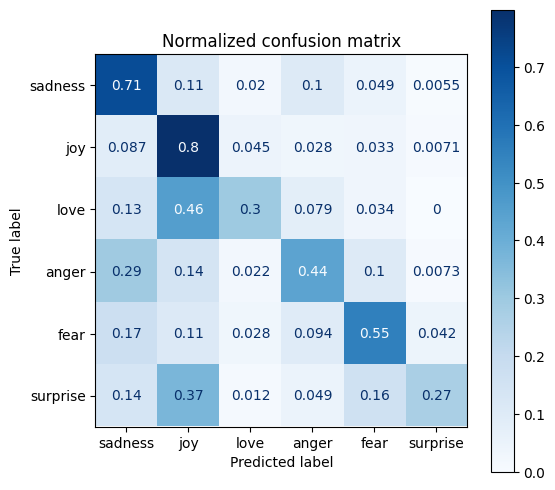

In [48]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
def plot_confusion_matrix(y_preds, y_true, labels):
  cm = confusion_matrix(y_true, y_preds, normalize = 'true')
  fig, ax = plt.subplots(figsize = (6, 6))
  disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = labels)
  disp.plot(ax = ax, cmap = 'Blues')
  plt.title('Normalized confusion matrix')
  plt.show()

plot_confusion_matrix(y_preds, y_valid, labels)

In [49]:
from transformers import AutoModelForSequenceClassification

In [51]:
# fine tuning the model

num_labels = 6
model = (AutoModelForSequenceClassification.from_pretrained(model_ckpt, num_labels = num_labels).to(device))

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_projector.bias', 'vocab_layer_norm.weight', 'vocab_transform.bias', 'vocab_transform.weight', 'vocab_projector.weight', 'vocab_layer_norm.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.bias', 'classifier.weight', 'classifier

In [60]:
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
  labels = pred.label_ids
  preds = pred.predictions.argmax(-1)
  f1 =  f1_score(labels, preds, average = 'weighted')
  acc = accuracy_score(labels, preds)
  return {'accuracy': acc, 'f1': f1}

In [53]:
from huggingface_hub import notebook_login

In [54]:
notebook_login()

Token is valid.
Your token has been saved to /root/.cache/huggingface/token
Login successful


In [55]:
from transformers import Trainer, TrainingArguments

In [61]:
batch_size = 64
logging_steps = len(emotions_encoded['train'])//batch_size
model_name = f'{model_ckpt}-finetuned-emotion'
training_args = TrainingArguments(output_dir = model_name,
                                  num_train_epochs = 2,
                                  learning_rate = 2e-5,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  weight_decay=.01,
                                  evaluation_strategy='epoch',
                                  disable_tqdm=False,
                                  logging_steps=logging_steps,
                                  push_to_hub=True,
                                  log_level='error')

In [58]:
TrainingArguments?

In [62]:
trainer = Trainer(model=model, args=training_args,
compute_metrics=compute_metrics,
train_dataset=emotions_encoded["train"],
eval_dataset=emotions_encoded["validation"],
tokenizer=tokenizer)
trainer.train();

/content/distilbert-base-uncased-finetuned-emotion is already a clone of https://huggingface.co/abhijitkalta/distilbert-base-uncased-finetuned-emotion. Make sure you pull the latest changes with `repo.git_pull()`.
/usr/local/lib/python3.9/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.225400,0.180640,0.922000,0.921893
2,0.139400,0.162587,0.933000,0.933470


In [63]:
pred_output = trainer.predict(emotions_encoded['validation'])

In [67]:
pred_output

PredictionOutput(predictions=array([[ 5.689628  , -1.0974354 , -1.8819959 , -0.7997733 , -0.8643755 ,
        -1.9267952 ],
       [ 5.591375  , -1.1324023 , -2.1853132 , -0.7655644 , -0.46787032,
        -1.9850006 ],
       [-1.6863786 ,  2.3524132 ,  3.4754443 , -1.4527137 , -2.3666127 ,
        -2.1693275 ],
       ...,
       [-1.2697897 ,  5.592952  , -0.3946494 , -1.9679837 , -2.3338146 ,
        -1.5770259 ],
       [-2.178447  ,  3.5270305 ,  2.9446762 , -1.569526  , -2.5841873 ,
        -2.0148087 ],
       [-1.5123246 ,  5.598343  , -0.429408  , -2.2997413 , -2.3898916 ,
        -1.0297259 ]], dtype=float32), label_ids=array([0, 0, 2, ..., 1, 1, 1]), metrics={'test_loss': 0.16258718073368073, 'test_accuracy': 0.933, 'test_f1': 0.9334700183474604, 'test_runtime': 4.4663, 'test_samples_per_second': 447.801, 'test_steps_per_second': 7.165})

In [68]:
pred_output.metrics

{'test_loss': 0.16258718073368073,
 'test_accuracy': 0.933,
 'test_f1': 0.9334700183474604,
 'test_runtime': 4.4663,
 'test_samples_per_second': 447.801,
 'test_steps_per_second': 7.165}

In [70]:
y_preds = np.argmax(pred_output.predictions, axis = 1)

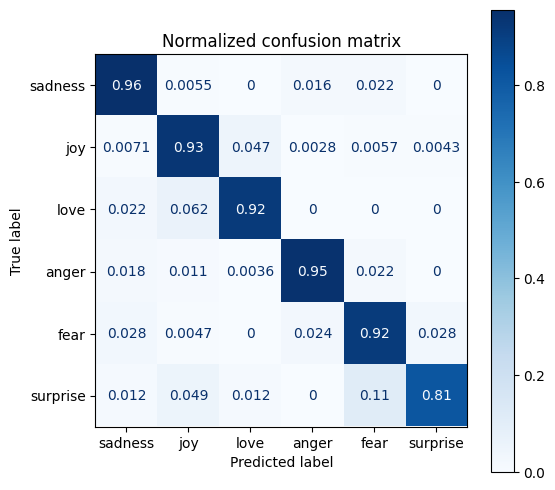

In [71]:
plot_confusion_matrix(y_preds, y_valid, labels)

In [72]:
from torch.nn.functional import cross_entropy

def forward_pass_with_label(batch):
  # Place all input tensors on the same device as the model
  inputs = {k:v.to(device) for k,v in batch.items() if k in tokenizer.model_input_names}
  with torch.no_grad():
    output = model(**inputs)
    pred_label = torch.argmax(output.logits, axis=-1)
    loss = cross_entropy(output.logits, batch["label"].to(device),reduction="none")
  # Place outputs on CPU for compatibility with other dataset columns
  return {"loss": loss.cpu().numpy(), "predicted_label": pred_label.cpu().numpy()}

# Convert our dataset back to PyTorch tensors
emotions_encoded.set_format("torch",columns=["input_ids", "attention_mask", "label"])

# Compute loss values
emotions_encoded["validation"] = emotions_encoded["validation"].map(forward_pass_with_label, batched=True, batch_size=16)

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [73]:
emotions_encoded.set_format("pandas")
cols = ["text", "label", "predicted_label", "loss"]
df_test = emotions_encoded["validation"][:][cols]
df_test["label"] = df_test["label"].apply(label_int2str)
df_test["predicted_label"] = (df_test["predicted_label"].apply(label_int2str))

In [74]:
df_test.sort_values("loss", ascending=False).head(10)

,text,label,predicted_label,loss
1801,i feel that he was being overshadowed by the s...,love,sadness,7.078177
882,i feel badly about reneging on my commitment t...,love,sadness,7.049983
1950,i as representative of everything thats wrong ...,surprise,sadness,6.932703
1963,i called myself pro life and voted for perry w...,joy,sadness,6.268901
1870,i guess i feel betrayed because i admired him ...,joy,sadness,6.070176
1111,im lazy my characters fall into categories of ...,joy,fear,6.017747
177,im sure much of the advantage is psychological...,sadness,joy,5.954806
415,im kind of embarrassed about feeling that way ...,love,sadness,5.808655
1509,i guess this is a memoir so it feels like that...,joy,fear,5.781141
318,i felt ashamed of these feelings and was scare...,fear,sadness,5.727834


In [75]:
df_test.sort_values("loss", ascending=True).head(10)

,text,label,predicted_label,loss
1873,i feel practically virtuous this month i have ...,joy,joy,0.003604
1921,i feel the need to write i always want to writ...,joy,joy,0.003646
1028,im now winded at the end of a tough rally but ...,joy,joy,0.003698
1147,i type i feel bouncy and excited to get out my...,joy,joy,0.003698
941,i expected but it did feel hopeful and it defi...,joy,joy,0.003733
1263,i feel this way about blake lively,joy,joy,0.003777
1012,i definitely succumbed to pre holiday sales bu...,joy,joy,0.003804
131,i feel like a graph doesnt show the data accur...,joy,joy,0.003843
632,i feel he is an terrific really worth bet,joy,joy,0.003847
260,i am feeling so invigorated and so ready to ke...,joy,joy,0.003858


In [ ]:
trainer.push_to_hub(commit_message="Training completed!")

In [77]:
from transformers import pipeline

model_id = "abhijitkalta/distilbert-base-uncased-finetuned-emotion"
classifier = pipeline("text-classification", model=model_id)
custom_tweet = "I saw a movie today and it was really good."
preds = classifier(custom_tweet, return_all_scores=True)

/usr/local/lib/python3.9/dist-packages/transformers/pipelines/text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar funcionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [78]:
preds

[[{'label': 'LABEL_0', 'score': 0.007803145330399275},
  {'label': 'LABEL_1', 'score': 0.9775877594947815},
  {'label': 'LABEL_2', 'score': 0.004074109718203545},
  {'label': 'LABEL_3', 'score': 0.0054044704884290695},
  {'label': 'LABEL_4', 'score': 0.003074157051742077},
  {'label': 'LABEL_5', 'score': 0.002056470839306712}]]

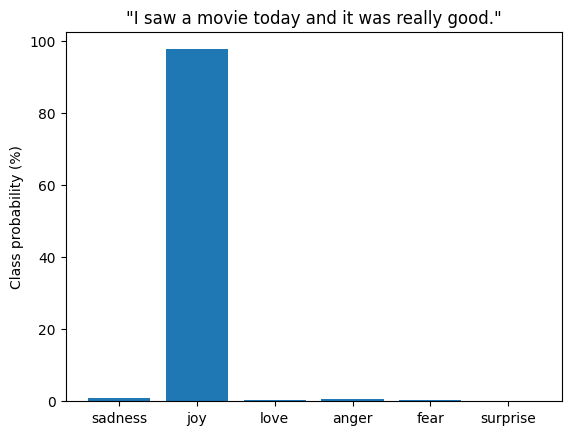

In [79]:
import pandas as pd
preds_df = pd.DataFrame(preds[0])
plt.bar(labels, 100 * preds_df["score"], color='C0')
plt.title(f'"{custom_tweet}"')
plt.ylabel("Class probability (%)")
plt.show()

In [82]:
final_result = labels[np.argmax(preds_df['score'])]
print(f'Predicted emotion: {final_result}')

Predicted emotion: joy
